# Exploring Model Results

# Reload Data

#### Reload Models

In [25]:
# needed to reload the model
from keras import backend as K
def mean_squared_percentage_error(y_true, y_pred):
    return K.mean(K.square((y_true - y_pred) / K.clip(K.abs(y_true),
                                            K.epsilon(),
                                            None)), axis=-1)
mspe = MSPE = mean_squared_percentage_error


In [26]:
from keras.models import load_model
model_4 = load_model('model/LSTM_Model_4.h5', 
                   custom_objects={'mean_squared_percentage_error': mean_squared_percentage_error})
model_1 = load_model('model/LSTM_Model_1.h5')
model_5 = load_model('model/LSTM_Model_5.h5', 
                   custom_objects={'mean_squared_percentage_error': mean_squared_percentage_error})

#### Reload Data


In [27]:
# load
import pickle
import numpy as np
import pandas as pd
X_train = pickle.load(open( 'feat_table/xgb_1_x_train_table.pkl', "rb" ))
y_train = pickle.load(open( 'feat_table/xgb_1_y_train_table.pkl', "rb" ))
X_valid = pickle.load(open( 'feat_table/xgb_1_x_valid_table.pkl', "rb" ))
y_valid = pickle.load(open( 'feat_table/xgb_1_y_valid_table.pkl', "rb" ))
test = pickle.load(open( 'feat_table/xgb_1_test_table.pkl', "rb" ))
features = pickle.load(open( 'feat_table/xgb_1_features_vector_vector.pkl', "rb" ))

# Visualise Data

### Visualise Inputs

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
sns.set(style="ticks")

In [55]:
X_train[['Store', 'Date']].groupby('Date').count()

,Store
Date,
2013-01-01,17
2013-01-02,1088
2013-01-03,1093
2013-01-04,1096
2013-01-05,1096
2013-01-06,19
2013-01-07,1091
2013-01-08,1094
2013-01-09,1091


In [56]:
X_valid[['Store', 'Date']].groupby('Date').count()

,Store
Date,
2013-01-02,23
2013-01-03,16
2013-01-04,12
2013-01-05,11
2013-01-07,15
2013-01-08,11
2013-01-09,14
2013-01-10,18
2013-01-11,8


In [57]:
graph_set = X_train[X_train.Store.isin([4, 224, 721])]
reduced_set = graph_set #[graph_set.Date < '2013-04-01']
reduced_set.shape

(2303, 26)

/home/brian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


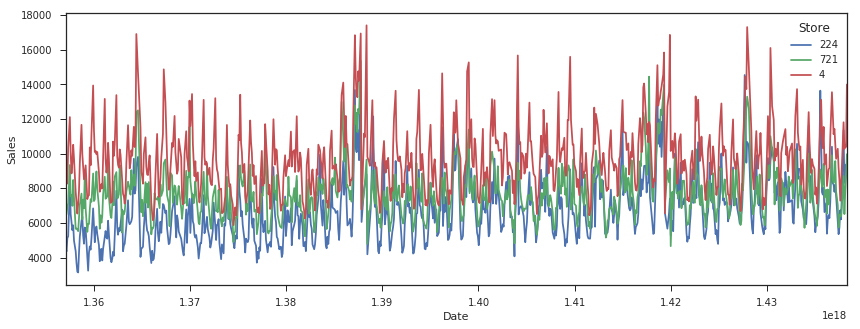

In [58]:
plt.figure(figsize=(14,5))
sns.tsplot(reduced_set, value='Sales', time = 'Date', 
           unit = 'Store', condition='Store')

# Examining Model Results

In [32]:
graph_set = X_valid[X_valid.Store.isin([4, 224, 721])]
print("Min:", min(X_valid.Date))
print("Max:", max(X_valid.Date))
X_valid.Store.unique().shape

Min: 2013-01-02 00:00:00
Max: 2015-07-31 00:00:00


(1115,)

In [52]:
graph_set.sort_values(by=['Store', 'Date'])

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,monthStr,IsPromoMonth,preds,actuals
3107,4,4,2013-01-25,9730,1409,1,1,0,0,3,...,2013,1,25,4,40.0,0.00,Jan,0,6389.187500,9730.0
2970,4,2,2013-07-10,6519,941,1,0,0,1,3,...,2013,7,10,28,46.0,0.00,Jul,0,6389.187500,6519.0
2903,4,3,2013-09-26,8447,1214,1,1,0,0,3,...,2013,9,26,39,48.0,0.00,Sept,0,6389.187500,8447.0
2747,4,1,2014-04-01,11772,1436,1,1,0,0,3,...,2014,4,1,14,55.0,0.00,Apr,0,6389.187500,11772.0
2726,4,0,2014-04-28,11863,1539,1,1,0,0,3,...,2014,4,28,18,55.0,0.00,Apr,0,6389.187500,11863.0
2689,4,4,2014-06-13,8077,1144,1,0,0,0,3,...,2014,6,13,24,57.0,0.00,Jun,0,6389.187500,8077.0
2682,4,5,2014-06-21,8683,1265,1,0,0,0,3,...,2014,6,21,25,57.0,0.00,Jun,0,6389.187500,8683.0
2660,4,3,2014-07-17,10045,1295,1,1,0,1,3,...,2014,7,17,29,58.0,0.00,Jul,0,6389.187500,10045.0
2619,4,2,2014-09-03,10729,1406,1,1,0,0,3,...,2014,9,3,36,60.0,0.00,Sept,0,6389.187500,10729.0
2612,4,3,2014-09-11,7924,1155,1,0,0,0,3,...,2014,9,11,37,60.0,0.00,Sept,0,6389.187500,7924.0


In [34]:
dtest = np.copy(graph_set[features].values)
test_frame = dtest.reshape((dtest.shape[0], 1, dtest.shape[1]) )
results = model_1.predict(test_frame)

In [35]:
results.shape

(42, 1)

In [36]:
results_analysis = graph_set
results_analysis['preds'] = np.exp(results) - 1 # reverse the conversion we started with
results_analysis['actuals'] = np.exp(y_valid) - 1 # reverse the conversion we started with

/home/brian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/brian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [37]:
# piv the data for the plot
graphs = results_analysis[['Store', 'preds', 'actuals', 'Date']]
graphs_melt = pd.melt(graphs, id_vars = ['Store', 'Date'], 
        value_vars = ['preds', 'actuals'], 
        var_name = 'sales_type',
       value_name = 'sales')
graphs_melt['id'] = graphs_melt[['Store', 'sales_type']].apply(lambda x: '_'.join(x.astype(str)), axis = 1)

/home/brian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


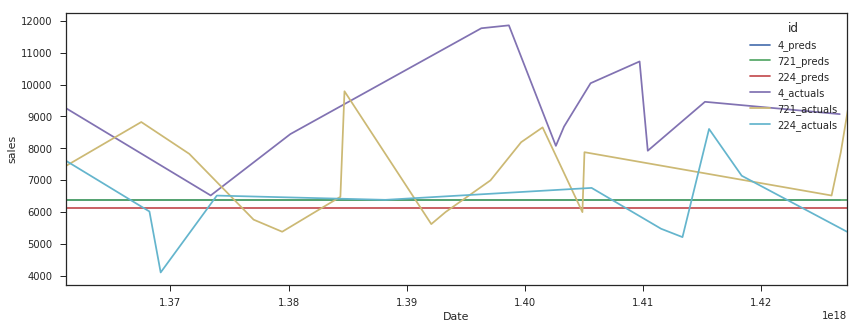

In [38]:
plt.figure(figsize=(14,5))
sns.tsplot(graphs_melt, value='sales', time = 'Date', 
           unit = 'id', condition='id')

# Look at Bias and Variance

In [40]:
full_analysis = X_valid

In [41]:
dvalid = np.copy(full_analysis[features].values)
validation_frame = dvalid.reshape((dvalid.shape[0], 1, dvalid.shape[1]) )
full_results = model_5.predict(validation_frame)

In [42]:
# Look at the direction of errors
full_analysis['preds'] = np.exp(full_results) - 1 # reverse the conversion we started with
full_analysis['actuals'] = np.exp(y_valid) - 1 # reverse the conversion we started with
full_analysis['error'] = full_analysis['preds'] - full_analysis['actuals'] 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39d22dd358>]], dtype=object)

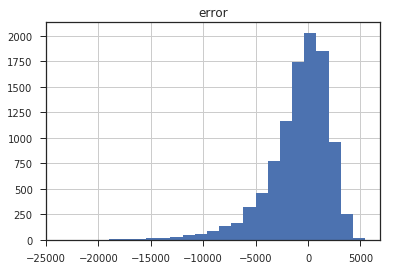

In [43]:
full_analysis.hist(column = 'error', bins = 25)

In [44]:
print('mean error: ', np.mean(full_analysis['error']))
print('std dev: ', np.std(full_analysis['error']))

mean error:  -906.680428162
std dev:  2995.27756867
